In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [4]:
df = pd.read_csv('Train Dataset .csv')

In [5]:
var = pd.read_csv('Variable_Definitions.csv')

In [6]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [7]:
var

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [8]:
df.shape

(7303, 15)

<AxesSubplot:>

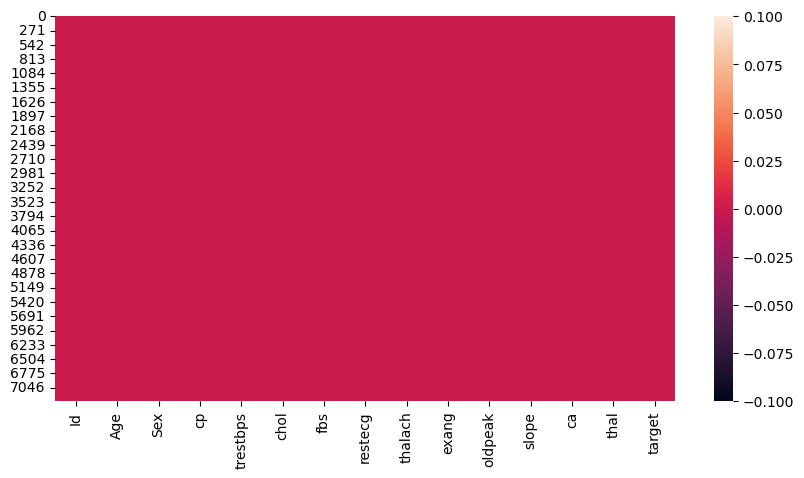

In [7]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [10]:
df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['exang_thalanch'] = df['exang'] * df['thalach']

In [12]:
df['cp'].unique()

array([1, 2, 0, 3], dtype=int64)

In [13]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,exang_thalanch
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,0
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,0
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,88
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,166


In [14]:
gender = df['Sex']

In [15]:
gender = pd.DataFrame(gender)
gender['Sex'] = gender['Sex'].replace(to_replace = [1,0], value = ['Male','Female'])

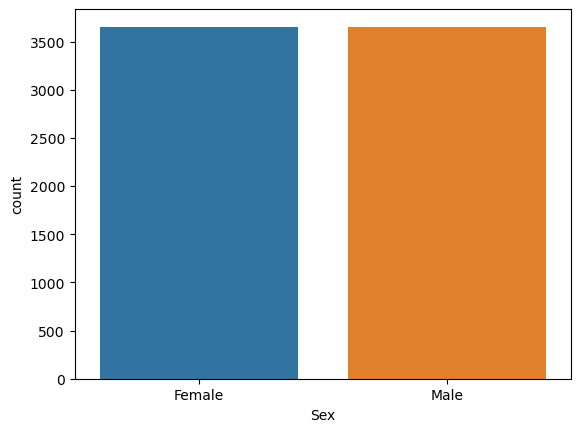

In [16]:
sns.countplot(data = gender, x = 'Sex');

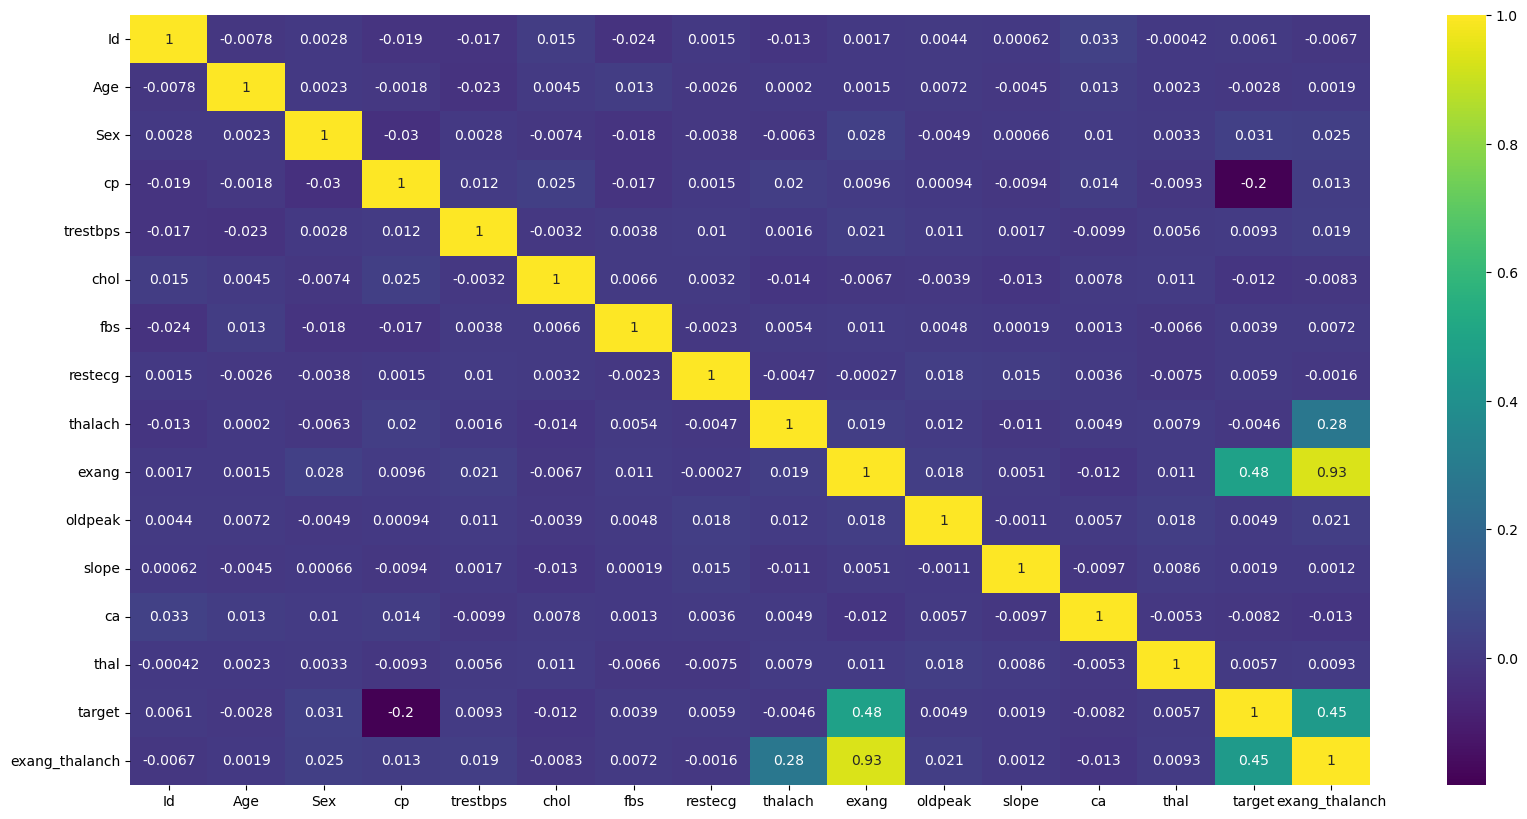

In [16]:
plt.figure(figsize = (20,10), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = 'viridis');

In [17]:
df.corr()['target'].sort_values()

cp               -0.198082
chol             -0.012291
ca               -0.008244
thalach          -0.004634
Age              -0.002846
slope             0.001909
fbs               0.003925
oldpeak           0.004899
thal              0.005709
restecg           0.005911
Id                0.006148
trestbps          0.009320
Sex               0.030608
exang_thalanch    0.448431
exang             0.481897
target            1.000000
Name: target, dtype: float64

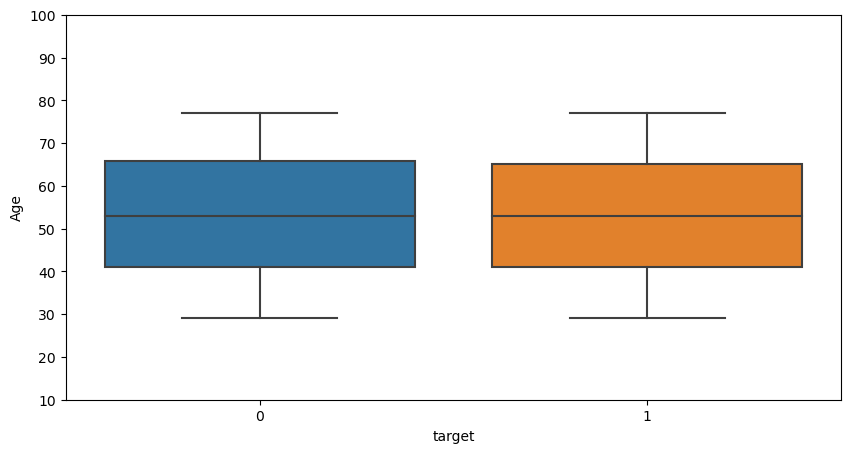

In [18]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(data = df, x = 'target', y = 'Age')
plt.ylim(10, 100);

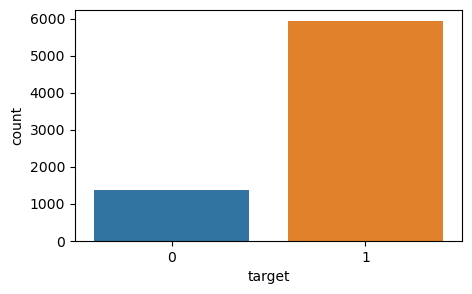

In [19]:
plt.figure(figsize = (5,3), dpi = 100)
sns.countplot(data = df, x = 'target');

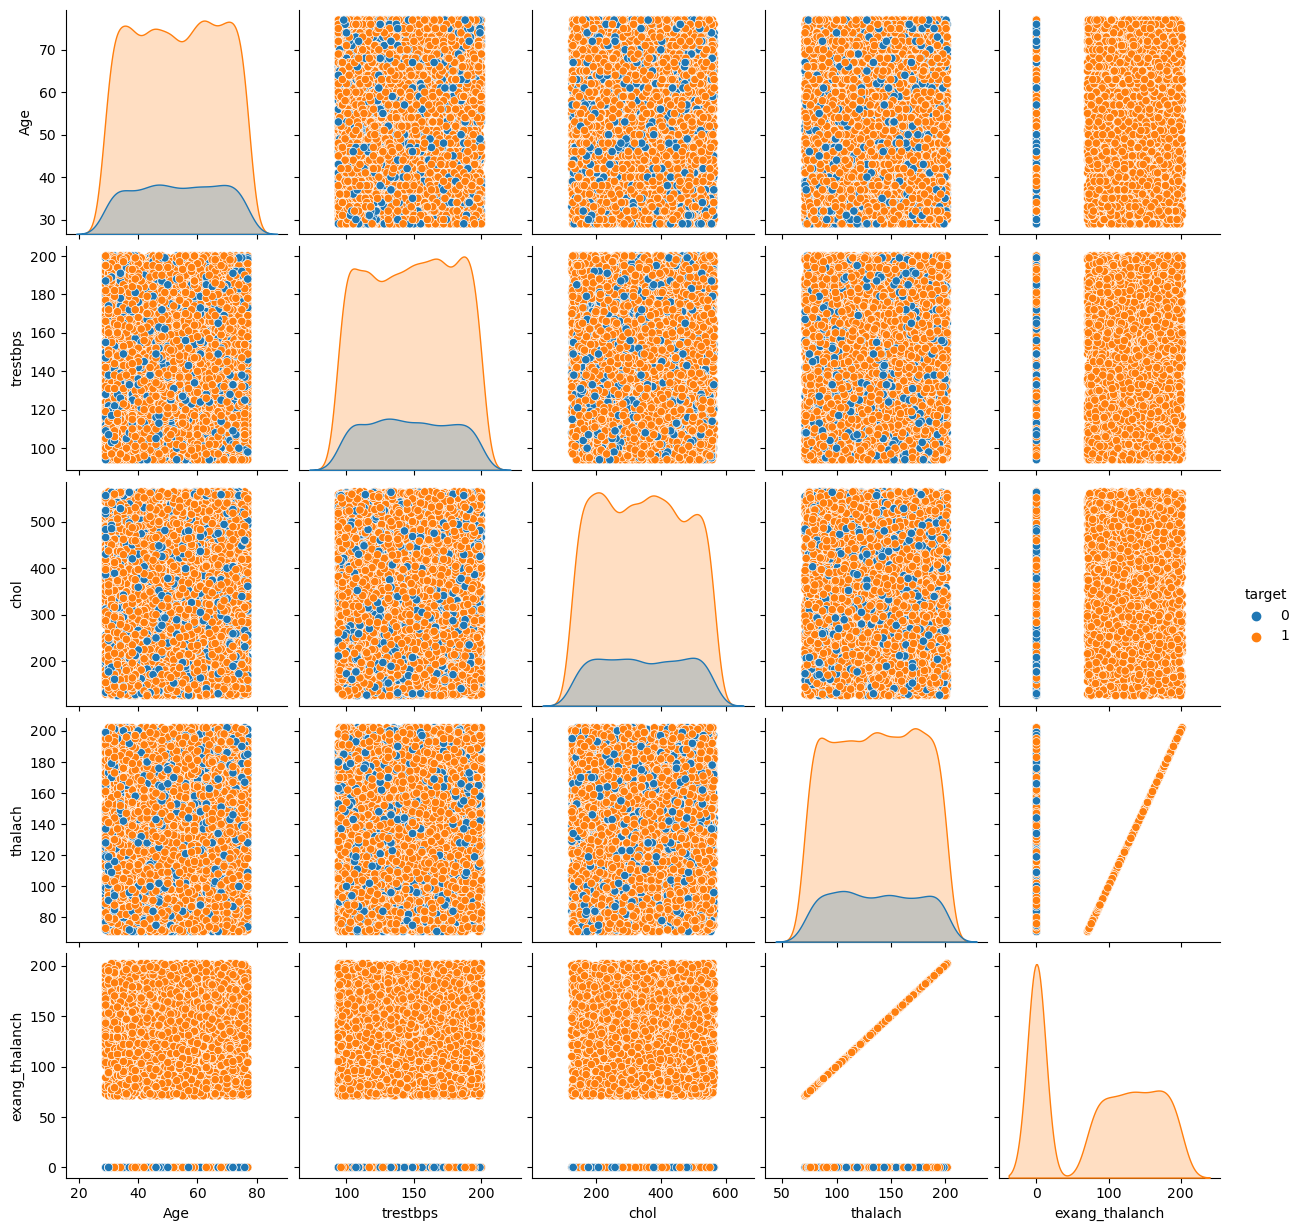

In [21]:
sns.pairplot(df[['Age','trestbps', 'chol','thalach','exang_thalanch','target']], hue ='target');

In [17]:
X = df.drop(['target','Id'],axis =1)

In [18]:
y = df['target']

In [19]:
X.shape

(7303, 14)

In [20]:
X.isnull().sum()

Age               0
Sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
exang_thalanch    0
dtype: int64

In [21]:
best_results = {
    'Logistic Regression': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'SVC': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'Random Forest': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'Decision Tree': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'Gradient Boosting': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'XGBoost': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'LightGBM': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None},
    'ANN': {'best_acc': 0, 'best_f1': 0, 'best_rand_state_acc': None, 'best_rand_state_f1': None}
}

for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(),
        'LightGBM': LGBMClassifier(),
        'ANN': MLPClassifier(max_iter=1000)
    }

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        

        if acc > best_results[model_name]['best_acc']:
            best_results[model_name]['best_acc'] = acc
            best_results[model_name]['best_rand_state_acc'] = i
        
        if f1 > best_results[model_name]['best_f1']:
            best_results[model_name]['best_f1'] = f1
            best_results[model_name]['best_rand_state_f1'] = i

for model_name, metrics in best_results.items():
    print(f"Model: {model_name}")
    print(f"  Best Accuracy: {metrics['best_acc']} (Random State: {metrics['best_rand_state_acc']})")
    print(f"  Best F1 Score: {metrics['best_f1']} (Random State: {metrics['best_rand_state_f1']})\n")

[LightGBM] [Info] Number of positive: 5341, number of negative: 1231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812690 -> initscore=1.467586
[LightGBM] [Info] Start training from score 1.467586
[LightGBM] [Info] Number of positive: 5333, number of negative: 1239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811473 -> initscore=1.459609
[LightGBM] [I

[LightGBM] [Info] Number of positive: 5338, number of negative: 1234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812234 -> initscore=1.464590
[LightGBM] [Info] Start training from score 1.464590
[LightGBM] [Info] Number of positive: 5342, number of negative: 1230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812842 -> initscore=1.468586
[LightGBM] [I

[LightGBM] [Info] Number of positive: 5349, number of negative: 1223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.813907 -> initscore=1.475603
[LightGBM] [Info] Start training from score 1.475603
[LightGBM] [Info] Number of positive: 5333, number of negative: 1239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of positive: 5362, number of negative: 1210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.815886 -> initscore=1.488717
[LightGBM] [Info] Start training from score 1.488717
[LightGBM] [Info] Number of positive: 5338, number of negative: 1234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812234 -> initscore=1.464590
[LightGBM] [Info] Start training from score 1.464590
[LightGBM] [Info] Number

[LightGBM] [Info] Number of positive: 5328, number of negative: 1244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.810712 -> initscore=1.454644
[LightGBM] [Info] Start training from score 1.454644
[LightGBM] [Info] Number of positive: 5353, number of negative: 1219
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:Bo

[LightGBM] [Info] Number of positive: 5334, number of negative: 1238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811625 -> initscore=1.460604
[LightGBM] [Info] Start training from score 1.460604
[LightGBM] [Info] Number of positive: 5336, number of negative: 1236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811929 -> initscore=1.462596
[LightGBM] [I

[LightGBM] [Info] Number of positive: 5349, number of negative: 1223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.813907 -> initscore=1.475603
[LightGBM] [Info] Start training from score 1.475603
[LightGBM] [Info] Number of positive: 5346, number of negative: 1226
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 6572, number of used features: 14
[LightGBM] [Info] [binary:Bo

## Decision Tree

Accuracy: 0.8508891928864569
f1_score: 0.9105824446267433
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       127
           1       0.90      0.92      0.91       604

    accuracy                           0.85       731
   macro avg       0.74      0.72      0.73       731
weighted avg       0.85      0.85      0.85       731



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


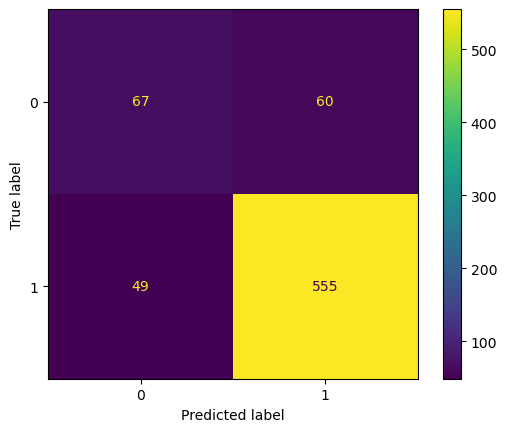

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)
dtscaler = StandardScaler()
X_train_scaled = dtscaler.fit_transform(X_train)
X_test_scaled = dtscaler.transform(X_test)

final_dt_model = DecisionTreeClassifier()
final_dt_model.fit(X_train_scaled, y_train)

y_pred = final_dt_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"f1_score: {f1}")

print(classification_report(y_test, y_pred))
plot_confusion_matrix(final_dt_model,X_test_scaled,y_test);

## Gradient Boosting

Accuracy: 0.8481532147742818
f1_score: 0.9071129707112972
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       126
           1       0.92      0.90      0.91       605

    accuracy                           0.85       731
   macro avg       0.74      0.76      0.75       731
weighted avg       0.86      0.85      0.85       731



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


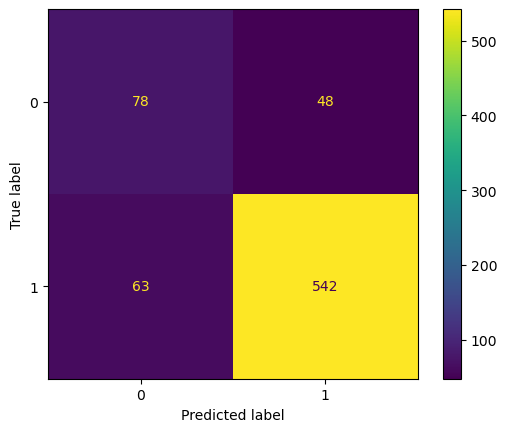

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=74)
gbscaler = StandardScaler()
X_train_scaled = gbscaler.fit_transform(X_train)
X_test_scaled = gbscaler.transform(X_test)

final_gb_model = GradientBoostingClassifier()
final_gb_model.fit(X_train_scaled, y_train)

y_pred = final_gb_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"f1_score: {f1}")

print(classification_report(y_test, y_pred))
plot_confusion_matrix(final_gb_model,X_test_scaled,y_test);

## XGBBoost

Accuracy: 0.8454172366621067
f1_score: 0.9086499595796281
              precision    recall  f1-score   support

           0       0.56      0.45      0.50       125
           1       0.89      0.93      0.91       606

    accuracy                           0.85       731
   macro avg       0.73      0.69      0.70       731
weighted avg       0.83      0.85      0.84       731



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


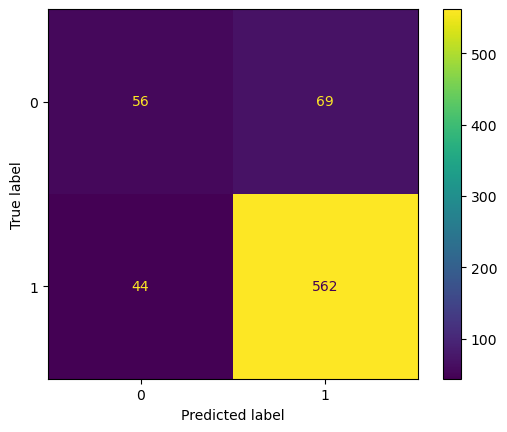

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=86)
xgbscaler = StandardScaler()
X_train_scaled = xgbscaler.fit_transform(X_train)
X_test_scaled = xgbscaler.transform(X_test)

final_xgb_model = XGBClassifier()
final_xgb_model.fit(X_train_scaled, y_train)

y_pred = final_xgb_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"f1_score: {f1}")

print(classification_report(y_test, y_pred))
plot_confusion_matrix(final_xgb_model,X_test_scaled,y_test);

## ANN

Accuracy: 0.8372093023255814
f1_score: 0.9012448132780083
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       132
           1       0.90      0.91      0.90       599

    accuracy                           0.84       731
   macro avg       0.72      0.71      0.72       731
weighted avg       0.83      0.84      0.84       731



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


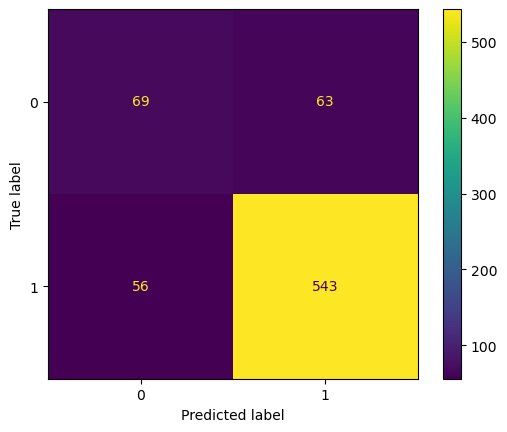

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=18)
annscaler = StandardScaler()
X_train_scaled = annscaler.fit_transform(X_train)
X_test_scaled = annscaler.transform(X_test)

final_ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
final_ann_model.fit(X_train_scaled, y_train)

y_pred = final_ann_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"f1_score: {f1}")

print(classification_report(y_test, y_pred))
plot_confusion_matrix(final_ann_model,X_test_scaled,y_test);

## Logistic Regression

Accuracy: 0.8440492476060192
f1_score: 0.9089456869009584
              precision    recall  f1-score   support

           0       0.56      0.38      0.46       125
           1       0.88      0.94      0.91       606

    accuracy                           0.84       731
   macro avg       0.72      0.66      0.68       731
weighted avg       0.83      0.84      0.83       731



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


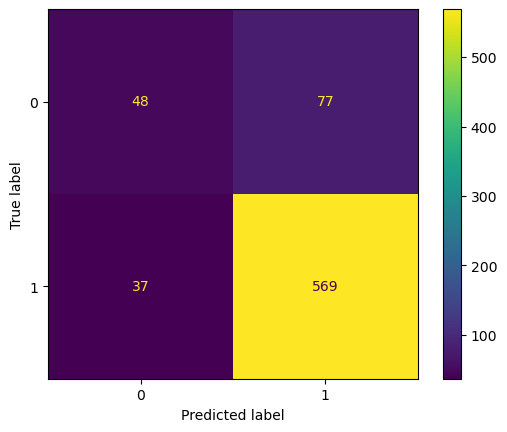

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52)
logscaler = StandardScaler()
X_train_scaled = logscaler.fit_transform(X_train)
X_test_scaled = logscaler.transform(X_test)


final_log_model = LogisticRegression()
final_log_model.fit(X_train_scaled, y_train)

y_pred = final_log_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"f1_score: {f1}")

print(classification_report(y_test, y_pred))
plot_confusion_matrix(final_log_model,X_test_scaled,y_test);

In [68]:
test = pd.read_csv('Test Dataset.csv')
sub = pd.read_csv('Sample Submission.csv')

In [69]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [70]:
test.shape

(2697, 14)

In [72]:
test.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [74]:
test['exang_thalanch'] = test['exang'] * test['thalach']

In [75]:
test.isnull().sum()

id                0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
exang_thalanch    0
dtype: int64

In [76]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,exang_thalanch
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1,170
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2,74
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0,73
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0,192
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3,0


In [77]:
X.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'exang_thalanch'],
      dtype='object')

In [79]:
test.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'exang_thalanch'],
      dtype='object')

In [80]:
sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [82]:
sub.shape

(2697, 1)

In [84]:
sub['Id'] = test['id']

In [85]:
test_df = test.drop(['id'],axis =1)

In [95]:
test_df.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [96]:
test_df.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'exang_thalanch'],
      dtype='object')

In [97]:
dttest_df_scaled = dtscaler.transform(test_df)
dt_pred = final_dt_model.predict(dttest_df_scaled)

In [99]:
sub['Target'] = dt_pred

In [104]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [105]:
sub.to_csv('DT.csv', index=False)

In [108]:
gbtest_df_scaled = gbscaler.transform(test_df)
gb_pred = final_gb_model.predict(gbtest_df_scaled)

In [109]:
sub['Target'] = gb_pred

In [111]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [112]:
sub.to_csv('GB.csv', index=False)

In [117]:
xgbtest_df_scaled = xgbscaler.transform(test_df)
xgb_pred = final_xgb_model.predict(xgbtest_df_scaled)

In [118]:
sub['Target'] = xgb_pred

In [120]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [121]:
sub.to_csv('XGB.csv', index=False)

In [125]:
anntest_df_scaled = annscaler.transform(test_df)
ann_pred = final_ann_model.predict(anntest_df_scaled)

In [126]:
sub['Target'] = ann_pred

In [128]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [129]:
sub.to_csv('ann.csv', index=False)

In [132]:
logtest_df_scaled = logscaler.transform(test_df)
log_pred = final_log_model.predict(logtest_df_scaled)

In [133]:
sub['Target'] = log_pred

In [135]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [136]:
sub.to_csv('log.csv', index=False)

In [138]:
dt = pd.read_csv('DT.csv')
gb = pd.read_csv('GB.csv')
xgb = pd.read_csv('XGB.csv')
ann = pd.read_csv('ann.csv')
log = pd.read_csv('log.csv')

In [143]:
target = pd.DataFrame({
    'DT_target': dt['Target'],
    'GB_target': gb['Target'],
    'XGB_target': xgb['Target'],
    'ANN_target': ann['Target'],
    'LOG_target': log['Target']})

In [144]:
target

,DT_target,GB_target,XGB_target,ANN_target,LOG_target
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,0,1,0
...,...,...,...,...,...
2692,1,0,0,1,0
2693,1,1,1,1,1
2694,1,1,1,1,1
2695,1,1,1,1,1


In [145]:
def dt_target(row):
    count_0 = (row == 0).sum()
    count_1 = (row == 1).sum()
    
    if count_0 >= 3:
        return 0
    elif count_1 >= 3:
        return 1
    else:
        return row['DT_target']


target['dtTarget'] = target.apply(dt_target, axis=1)
print(target)

      DT_target  GB_target  XGB_target  ANN_target  LOG_target  dtTarget
0             1          1           1           1           1         1
1             1          1           1           1           1         1
2             1          1           1           1           1         1
3             1          1           1           1           1         1
4             1          1           0           1           0         1
...         ...        ...         ...         ...         ...       ...
2692          1          0           0           1           0         0
2693          1          1           1           1           1         1
2694          1          1           1           1           1         1
2695          1          1           1           1           1         1
2696          1          0           0           1           0         0

[2697 rows x 6 columns]


In [146]:
def log_target(row):
    count_0 = (row == 0).sum()
    count_1 = (row == 1).sum()
    
    if count_0 >= 3:
        return 0
    elif count_1 >= 3:
        return 1
    else:
        return row['LOG_target']


target['logTarget'] = target.apply(log_target, axis=1)
print(target)

      DT_target  GB_target  XGB_target  ANN_target  LOG_target  dtTarget  \
0             1          1           1           1           1         1   
1             1          1           1           1           1         1   
2             1          1           1           1           1         1   
3             1          1           1           1           1         1   
4             1          1           0           1           0         1   
...         ...        ...         ...         ...         ...       ...   
2692          1          0           0           1           0         0   
2693          1          1           1           1           1         1   
2694          1          1           1           1           1         1   
2695          1          1           1           1           1         1   
2696          1          0           0           1           0         0   

      logTarget  
0             1  
1             1  
2             1  
3             1

In [147]:
sub['Target'] = target['logTarget']

In [148]:
sub.isnull().sum()

Id        0
Target    0
dtype: int64

In [149]:
sub.to_csv('log_m.csv', index=False)

In [150]:
sub['Target'] = target['dtTarget']

In [151]:
sub.to_csv('dt_m.csv', index=False)